### Import Necessary Libraries

In [495]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Task 1: Merging 12 months of sales data into a single file

In [496]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [497]:
df.drop([1], inplace=True)

In [498]:
df.reset_index(inplace=True)

In [499]:
df.drop(columns=['index'], inplace=True)

In [500]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [501]:
#files = [file for file in os.listdir('Sales_Data')]
# for file in files:
# print(file)

all_months_data = pd.DataFrame()

for file in os.listdir('Sales_Data'):
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [502]:
all_months_data

""


In [515]:
all_months_data = pd.DataFrame()
# all_months_data is an empty pandas dataframe that we use initially

for file in os.listdir('Sales_Data'):
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
# when we did concat, we didn't specify the axis, so it it concatenated
# as axis=0, which is row wise 

#all_months_data.to_csv("all_data.csv", index=False)

all_months_data.to_csv("all_data2.csv", index=True)

#### Read in updated dataframe

In [516]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [517]:
all_data.shape

(186850, 6)

#### Question 1: What was the best month for sales? How much was earned that month?

In [518]:
## Add a month column for ease of analysis 
# Solution: Take the first 2 string characters in the Date and put them
# in the month column 


In [398]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [529]:
all_data['Order Date'].str[0:2]

0         12
1         12
2         12
3         12
4         12
          ..
186845    06
186846    06
186847    06
186848    06
186849    06
Name: Order Date, Length: 186850, dtype: object

In [399]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [400]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [401]:
# We need to convert Month column into integers
# Before we can do this, we need to clean the data because it has NaNs

### Clean the Data

In [402]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [403]:
all_data.shape

(186850, 7)

In [404]:
# at this point you could use EXCEL to sort the data and see what we
# are dealing with 

#### For this purpose, we will Drop rows of NaN

In [405]:
# visualize all the NaN values 
all_data[all_data.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
all_data = all_data.dropna(how='all')

In [407]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### Convert Month Column into INT

In [408]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [409]:
all_data['Month'].unique()

array(['12', 'Or', '01', '04', '05', '02', '03', '08', '09', '06', '11',
       '10', '07'], dtype=object)

#### Find "Or" and delete it

In [410]:
all_data = all_data[all_data['Month']!='Or']

In [411]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [412]:
all_data['Month'] = all_data['Month'].astype('int32')

#### Question 1: What was the best month for sales? How much was earned that month?

#### Task 3: Add a Sales Column

In [413]:
# convert column to correct type
# we can also convert to simply numeric type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [414]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [415]:
all_data.groupby(['Month'])[['Sales']].sum()

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


**Best Month**: December with 4,613,443

**Worst Month**: January with 1,822,257

In [416]:
import matplotlib.pyplot as plt
%matplotlib inline

Monthly_Sales = all_data.groupby(['Month'])[['Sales']].sum()
Monthly_Sales

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [417]:
Monthly_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


Text(0, 0.5, 'Sales in US($)')

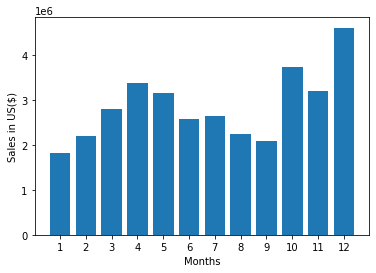

In [418]:
Months = range(1,13)

plt.bar(Months, Monthly_Sales['Sales'])
plt.xticks(Months)
plt.xlabel('Months')
plt.ylabel('Sales in US($)')

With these results, you could then try to figure out why certain months were better than others. Maybe in May or June, did we spend more money in advertising? Look for the correlations between the variabels, which may have led to these results. 

In Dec, due to Christmas, it makes sense why the Sales would be so high 

#### Question 2: Which US city had the highest number of sales?

In [419]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [425]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [426]:
## Method 1: Use .apply()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# for each of the cell contents we want to split it at the comma & grab
# the first index 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [427]:
## Method 2: Create a function 

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# We should get the state as well, becuase there could be duplicate cities
# with the same name 

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [428]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


In [429]:
all_data['City'].unique()

array([' New York City, NY', ' San Francisco, CA', ' Atlanta, GA',
       ' Portland, OR', ' Dallas, TX', ' Los Angeles, CA', ' Boston, MA',
       ' Austin, TX', ' Portland, ME', ' Seattle, WA'], dtype=object)

Text(0, 0.5, 'Sales in US($)')

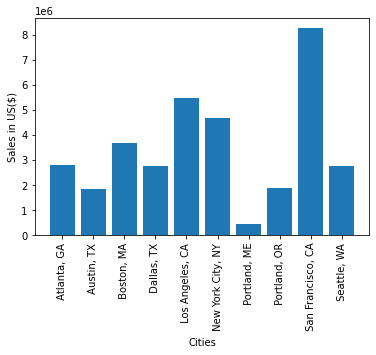

In [430]:
Cities = all_data['City'].unique()

Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities, results['Sales'])
plt.xticks(Cities, rotation = 'vertical')
plt.xlabel('Cities')
plt.ylabel('Sales in US($)')

At this point, you can ask why San Fran might be the highest in Sales. So then, you could look at the advertising initiative in each of the cities to see which one may not have the best advertising

#### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying the product?

In order to answer this question, we will have to aggregate the order date over a distribution of 24hr period

In [431]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [432]:
# Convert Order Date into a Date Time Object 

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [433]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [434]:
# once you convert into datetime, pandas automatically knows
# which is the year, the month and the time 

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [435]:
all_data['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

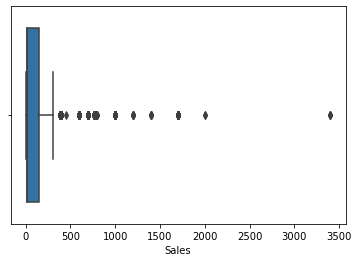

In [478]:
sns.boxplot(all_data.Sales)

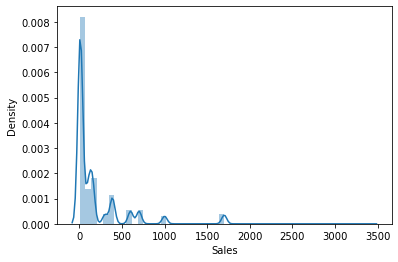

In [480]:
sns.distplot(all_data.Sales)

In [436]:
all_data.groupby('Hour')[['Sales']].sum()

,Sales
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


In [437]:
all_data.groupby(['Hour'])[['Quantity Ordered']].count().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered
Hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


In [438]:
all_data.groupby(['Hour'])[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Sales
Hour,,
19,14470,2412938.54
12,14202,2316821.34
11,14005,2300610.24
18,13802,2219348.30
20,13768,2281716.24
13,13685,2155389.80
14,12362,2083672.73
10,12308,1944286.77
21,12244,2042000.86


In [439]:
all_data.groupby(['Hour'])[['Quantity Ordered','Sales']].sum().corr()

,Quantity Ordered,Sales
Quantity Ordered,1.000000,0.998523
Sales,0.998523,1.000000


In [462]:
all_data.groupby(['Hour'])[['Quantity Ordered','Sales']].sum().corr(method='kendall')

,Quantity Ordered,Sales
Quantity Ordered,1.000000,0.927536
Sales,0.927536,1.000000


In [463]:
all_data.groupby(['Hour'])[['Quantity Ordered','Sales']].sum().corr(method='spearman')

,Quantity Ordered,Sales
Quantity Ordered,1.000000,0.988696
Sales,0.988696,1.000000


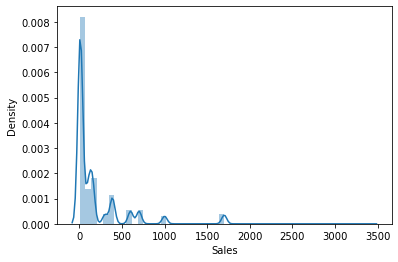

In [473]:
sns.distplot(all_data.Sales)

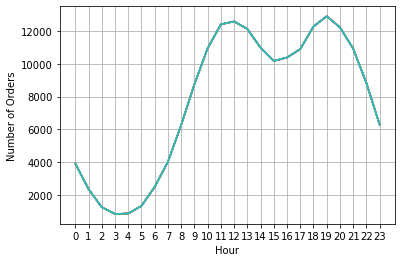

In [440]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
# this plots the hours with their count value 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()

Most people seem to be making purchases around 12pm & 7pm - so a good time to show advertisements might be either in the morning (before work), around 11am (right before lunch break) and around 6pm (after work).

You could do specific graphs for certain cities and see how the marketing strategies would diff between the cities

In [441]:
all_data.groupby(['City','Hour'])[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered', ascending=False)

Quantity Ordered      Sales
City               Hour                             
 San Francisco, CA 19                3496  594421.32
                   12                3420  562490.06
                   11                3353  540696.91
                   18                3346  537069.51
                   20                3300  558917.53
...                                   ...        ...
 Portland, ME      1                   35    7652.14
                   5                   16     882.14
                   2                   15    2887.35
                   3                   12    1488.48
                   4                   12     651.27

[240 rows x 2 columns]

#### Question 4: What products are most often sold together?

In [442]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [443]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

**How do we know if a product is sold together with another product?**

Products that were purchased together would have the same Order ID. Order ID means 1 transaction and in 1 transaction someone could buy multiple things. 

Goal: Is to find rows with duplicate Order IDs

In [444]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# keep=Flase will keep ALL occurences of the duplicate

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32


In [445]:
df.groupby(['Order ID'])[['Product']].count()


,Product
Order ID,
141275,2
141290,2
141365,2
141384,2
141450,2
...,...
319536,2
319556,2
319584,2


In [446]:
# we need to start grouping the products together 
# want to create a new column that will have the orders that were placed 
# together in the same line 


df['Grouped'] = df.groupby(['Order ID'])[['Product']].transform(lambda x: ','.join(x))

# transform() is similar to apply, where it takes in lambda x
# all the products assocaited with one Order ID will get joined
# together via a comma

In [447]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32,"Vareebadd Phone,USB-C Charging Cable"


In [448]:
# now we have duplicated occurences of the same Order ID

df = df[['Order ID','Grouped']].drop_duplicates()

In [449]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [450]:
from itertools import combinations
from collections import Counter

In [451]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [452]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


This can help you become smarter with promotions & advertising. 

#### Question 5: What product sold the most? Why do you think it sold the most?

In [453]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [454]:
quantity_ordered = all_data.groupby(('Product'))[['Quantity Ordered']].sum()
quantity_ordered.head()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635


In [455]:
all_data.groupby(('Product'))[['Quantity Ordered']].sum().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


Text(0, 0.5, 'Quantity Ordered')

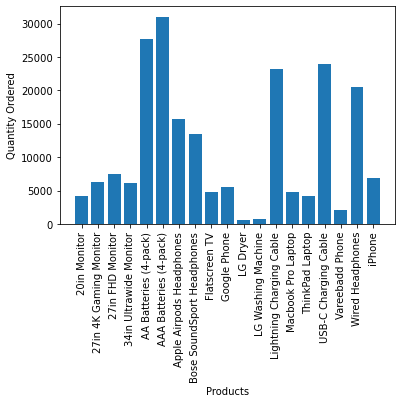

In [456]:
products = [product for product, df in all_data.groupby('Product')]

plt.bar(products, quantity_ordered['Quantity Ordered'])
# this plots the hours with their count value 

plt.xticks(products, rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

AAA Batteries were the most common item, along with headphones and other stuff. The reason for this might be that these prices are cheaper as compared to the price of a LG Dryer

As data scientists it is always good to prove our hypothesis, so we should overlay this graph with maybe the actual prices for the items 

In [457]:
prices = all_data.groupby('Product')[['Price Each']].mean()
print(prices)

                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00
LG Dryer                        600.00
LG Washing Machine              600.00
Lightning Charging Cable         14.95
Macbook Pro Laptop             1700.00
ThinkPad Laptop                 999.99
USB-C Charging Cable             11.95
Vareebadd Phone                 400.00
Wired Headphones                 11.99
iPhone                          700.00


Need to add a 2nd y-axis in a matplotlib bar graph

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

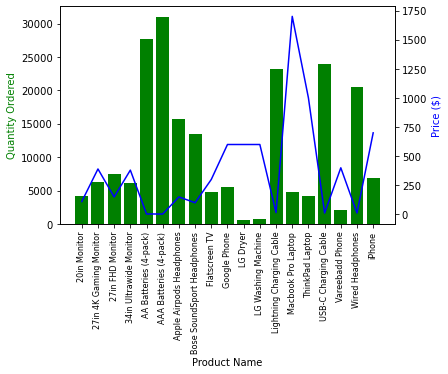

In [458]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered['Quantity Ordered'], color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(labels=products, rotation='vertical', size=8)


In [474]:
quantity_ordered = all_data.groupby(('Product'))[['Quantity Ordered']].sum()
prices = all_data.groupby('Product')[['Price Each']].mean()

quan_price = pd.concat([quantity_ordered, prices], axis=1)
print(quan_price)
quan_price.corr()

                            Quantity Ordered  Price Each
Product                                                 
20in Monitor                            4129      109.99
27in 4K Gaming Monitor                  6244      389.99
27in FHD Monitor                        7550      149.99
34in Ultrawide Monitor                  6199      379.99
AA Batteries (4-pack)                  27635        3.84
AAA Batteries (4-pack)                 31017        2.99
Apple Airpods Headphones               15661      150.00
Bose SoundSport Headphones             13457       99.99
Flatscreen TV                           4819      300.00
Google Phone                            5532      600.00
LG Dryer                                 646      600.00
LG Washing Machine                       666      600.00
Lightning Charging Cable               23217       14.95
Macbook Pro Laptop                      4728     1700.00
ThinkPad Laptop                         4130      999.99
USB-C Charging Cable           

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.601443
Price Each,-0.601443,1.000000


In [476]:
quan_price.corr(method='kendall')

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.625393
Price Each,-0.625393,1.000000


In [477]:
quan_price.corr(method='spearman')

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.776803
Price Each,-0.776803,1.000000


In [485]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4)
memory usage: 21.3+ MB


In [481]:
all_data.corr()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417,-0.002218,0.001225
Price Each,-0.148272,1.000000,-0.003375,0.999203,0.001721,-0.002163
Month,0.000791,-0.003375,1.000000,-0.003466,0.001731,-0.002075
Sales,-0.139417,0.999203,-0.003466,1.000000,0.001668,-0.002162
Hour,-0.002218,0.001721,0.001731,0.001668,1.000000,-0.015345
Minute,0.001225,-0.002163,-0.002075,-0.002162,-0.015345,1.000000


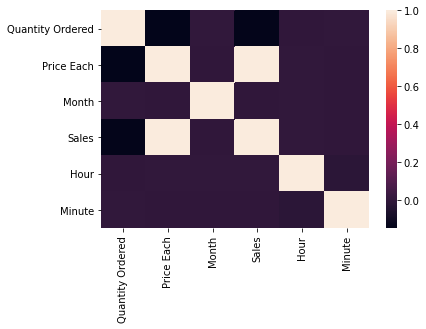

In [482]:
sns.heatmap(all_data.corr())